In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
import numpy as np
from PIL import Image as pim

In [3]:
def moveToSemitone(image):
    imageData = image.load()
    resultImage = pim.new('L',image.size)
    newImageData = resultImage.load()
    for x in range(image.size[0]):
      for y in range(image.size[1]):
        newImageData[x,y] = int(0.3*imageData[x,y][0] + 0.59 * imageData[x,y][1] + 0.11 * imageData[x,y][2])
    return resultImage

In [4]:
def sauvola_binarization(image, window_size=15, k=0.2, r=128):
    grey_image = moveToSemitone(image)
    grey_data = np.array(grey_image)
    image_data =np.array (image)
    height, width = grey_data.shape
    binary_image = np.zeros_like(grey_data)

    for i in range(height):
        for j in range(width):
            x1 = max(0, i - window_size // 2)
            x2 = min(height, i + window_size // 2)
            y1 = max(0, j - window_size // 2)
            y2 = min(width, j + window_size // 2)
            local_mean = np.mean(grey_data[x1:x2, y1:y2])
            local_std = np.std(grey_data[x1:x2, y1:y2])
            threshold = local_mean * (1 + k * ((local_std / r) - 1))

            if grey_data[i, j] > threshold:
                binary_image[i, j] = 255

    return binary_image

In [5]:
image = pim.open("im1.png")
binary_image_data = sauvola_binarization(image)


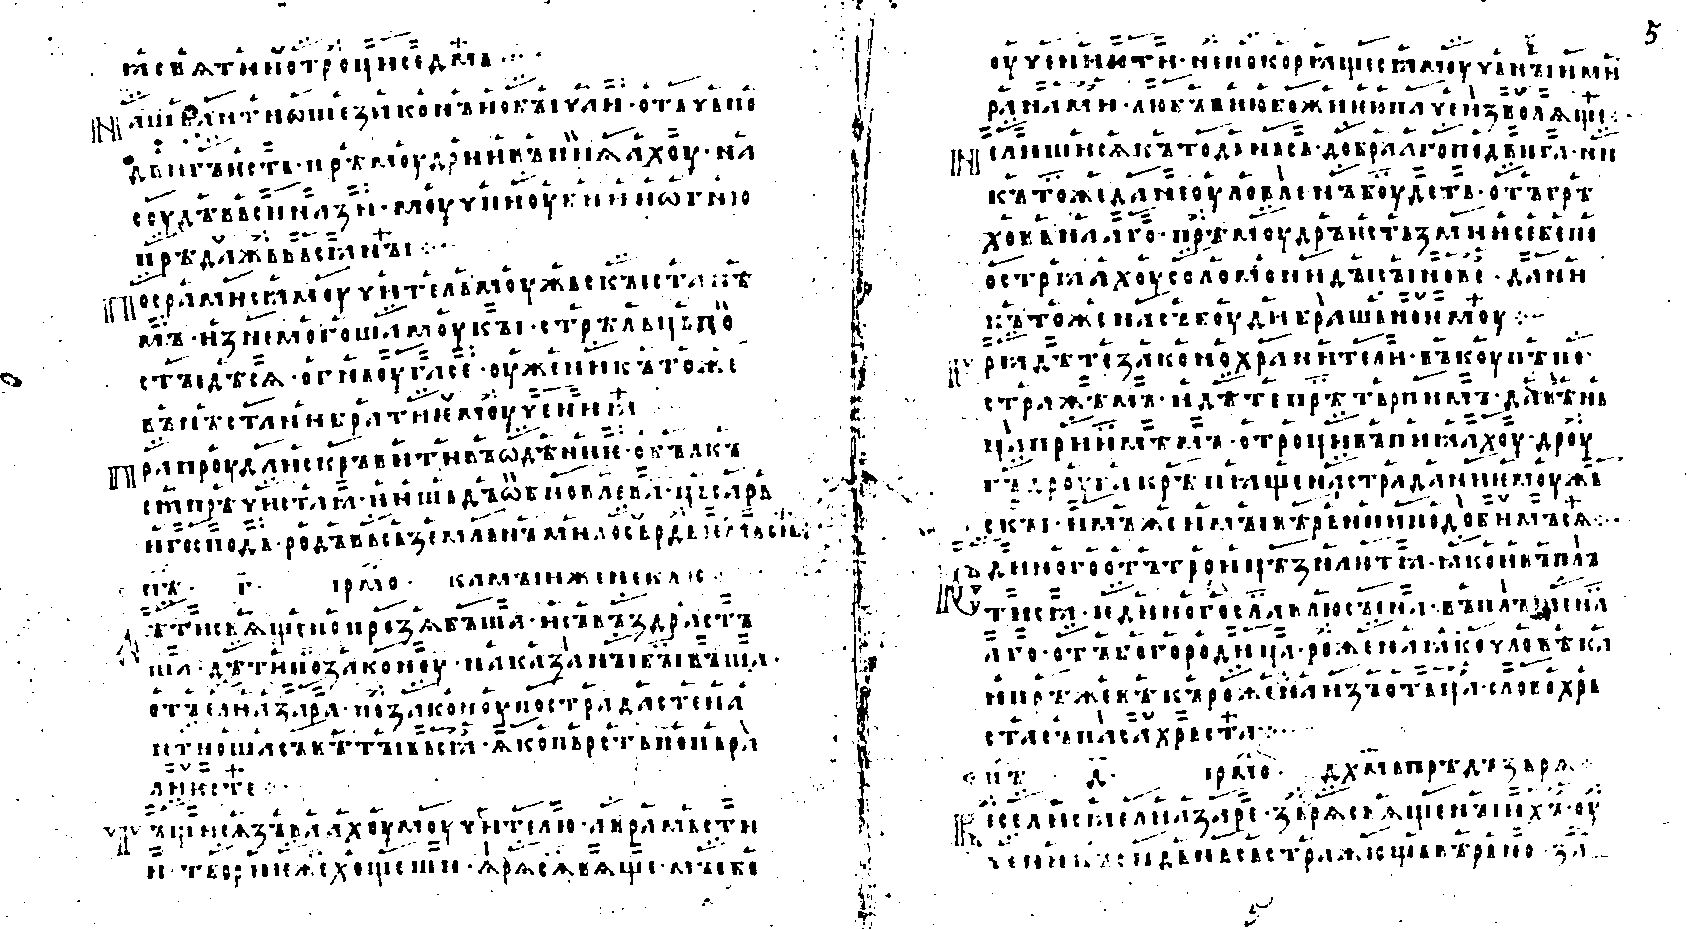

In [6]:
pim.fromarray(binary_image_data)